Construct a model for scoring
-----------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')
import shap
from shap import TreeExplainer, summary_plot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.metrics import roc_auc_score
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import fbeta_score, make_scorer

J'importe des données

In [3]:
df=pd.read_csv('home-credit-default-risk/application_train.csv', sep =',')

In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df.shape

(307511, 122)

In [7]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


### L'analyse exploratoire des données

Text(0.5, 1.0, 'Grouped Box Plot for GENDER/CREDIT')

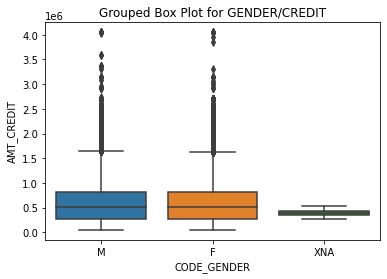

In [8]:
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data=df).set_title('Grouped Box Plot for GENDER/CREDIT')

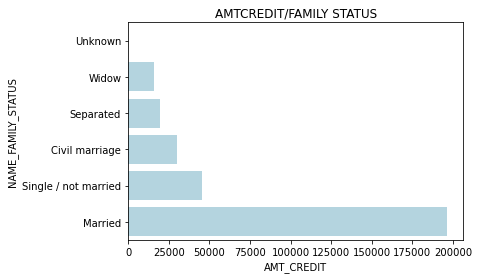

In [9]:
res = df.groupby(['NAME_FAMILY_STATUS'])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')
ax=sns.barplot(x='AMT_CREDIT', y='NAME_FAMILY_STATUS', color='lightblue', data=res).set_title('AMTCREDIT/FAMILY STATUS')

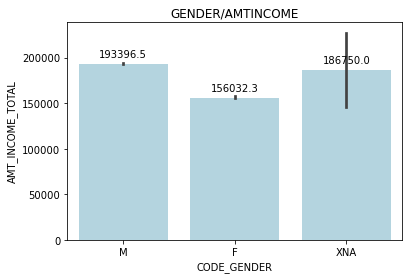

In [10]:
g= sns.barplot(x='CODE_GENDER', y='AMT_INCOME_TOTAL', color='lightblue', data=df)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    g.set_title('GENDER/AMTINCOME')

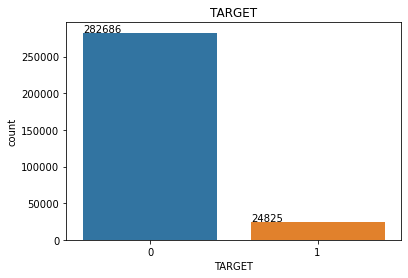

In [11]:
s = sns.countplot(x = 'TARGET',data = df)
for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    s.set_title('TARGET')

0 means actually the credit is given and 1 means the credit is rejected.

In [12]:
r1 = df.groupby(['CNT_CHILDREN'])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')

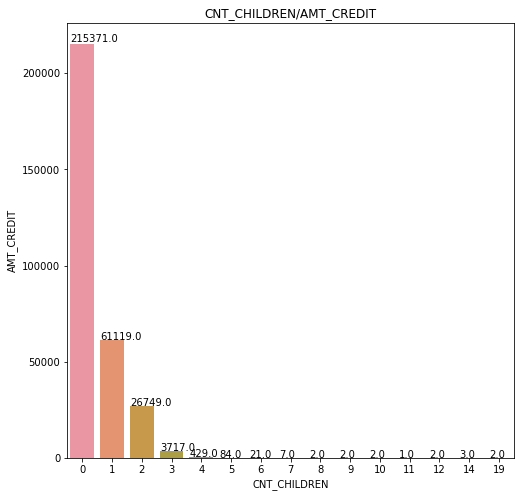

In [13]:
plt.figure(figsize=(8, 8))
s = sns.barplot(x='CNT_CHILDREN', y='AMT_CREDIT', data=r1)
for p in s.patches:
    s.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.title("CNT_CHILDREN/AMT_CREDIT")

Text(0.5, 1.0, 'Pie Plot for TARGET')

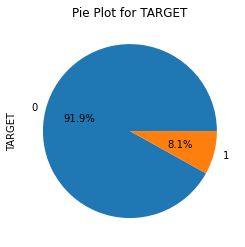

In [14]:
df['TARGET'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for TARGET')

les données sont déséquilibrées.

<AxesSubplot:title={'center':'INCOME/CREDIT'}, xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

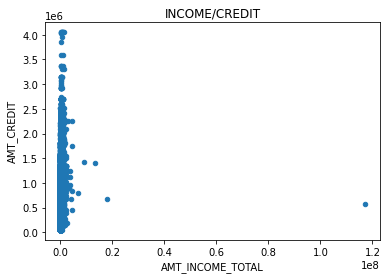

In [15]:
df.plot(kind = 'scatter', x="AMT_INCOME_TOTAL", y="AMT_CREDIT", title="INCOME/CREDIT")

<AxesSubplot:title={'center':'AMTGOODSP/CREDIT'}, xlabel='AMT_GOODS_PRICE', ylabel='AMT_CREDIT'>

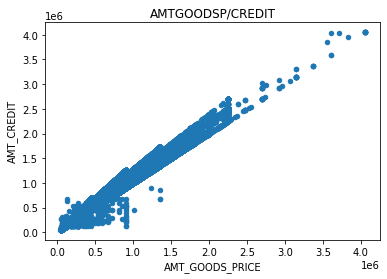

In [16]:
df.plot(kind = 'scatter', x="AMT_GOODS_PRICE", y="AMT_CREDIT", title="AMTGOODSP/CREDIT")

Text(0.5, 1.0, 'AMT_CREDIT/OCCUPATION')

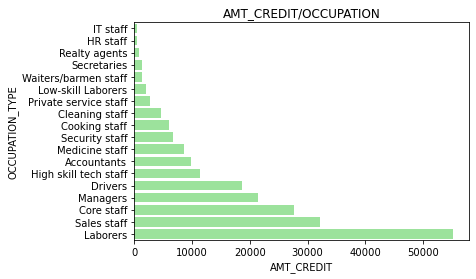

In [17]:
result = df.groupby(["OCCUPATION_TYPE"])['AMT_CREDIT'].count().reset_index().sort_values('AMT_CREDIT')
sns.barplot(x='AMT_CREDIT', y='OCCUPATION_TYPE', color='lightgreen', data=result)
plt.title("AMT_CREDIT/OCCUPATION")

Text(0.5, 1.0, 'Distribution Plot pour AMTCREDIT')

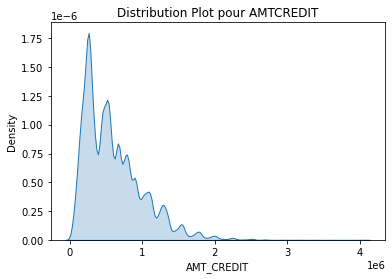

In [18]:
sns.kdeplot(df['AMT_CREDIT'], fill=True).set_title('Distribution Plot pour AMTCREDIT')

Text(0.5, 1.0, 'Box Plot pour Amounts Goods Price')

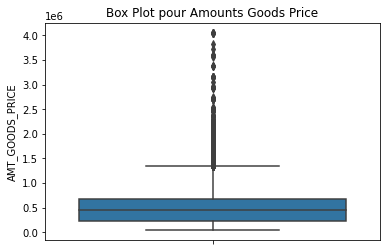

In [19]:
sns.boxplot(y='AMT_GOODS_PRICE', data=df).set_title('Box Plot pour Amounts Goods Price')

In [20]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [21]:
X1=df.select_dtypes('object')

In [22]:
X1.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [23]:
X1['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [24]:
X1.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [25]:
X1= X1.drop(columns=['FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])

In [26]:
X1.isnull().sum()

NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
OCCUPATION_TYPE               96391
WEEKDAY_APPR_PROCESS_START        0
ORGANIZATION_TYPE                 0
dtype: int64

In [27]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [28]:
col=['OCCUPATION_TYPE', 'NAME_TYPE_SUITE']
for x in col:
    X1[x]=X1[x].fillna(X1[x].mode()[0])

In [29]:
X1.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [30]:
X1.shape

(307511, 12)

In [31]:
X2 = df._get_numeric_data()

In [32]:
X2.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [33]:
X2.shape

(307511, 106)

In [34]:
#X2[X2['AMT_REQ_CREDIT_BUREAU_QRT'].isnull() == True]

In [35]:
X2 = X2.drop(columns=['REG_REGION_NOT_LIVE_REGION', 
                      'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                      'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
                      'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 
                      'EXT_SOURCE_2','EXT_SOURCE_3', 'APARTMENTS_AVG', 
                      'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
                      'YEARS_BUILD_AVG', 'COMMONAREA_AVG','ELEVATORS_AVG', 
                      'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 
                      'LIVINGAPARTMENTS_AVG'])

In [36]:
X2.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       

In [37]:
col=['DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'AMT_GOODS_PRICE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'BASEMENTAREA_MODE', 'LANDAREA_MODE', 'LANDAREA_MEDI',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'OWN_CAR_AGE', 'NONLIVINGAPARTMENTS_AVG',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MEDI',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_MODE', 
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'APARTMENTS_MEDI', 'ELEVATORS_MODE', 'TOTALAREA_MODE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'OBS_60_CNT_SOCIAL_CIRCLE', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LIVINGAREA_AVG',
     'DEF_60_CNT_SOCIAL_CIRCLE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'AMT_ANNUITY',
     'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'DEF_30_CNT_SOCIAL_CIRCLE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'CNT_FAM_MEMBERS']
for x in col:
    X2[x]=X2[x].fillna(X2[x].mean())

In [38]:
X2.isnull().mean().sort_values()

SK_ID_CURR                    0.0
FLAG_DOCUMENT_3               0.0
FLAG_DOCUMENT_2               0.0
DAYS_LAST_PHONE_CHANGE        0.0
DEF_60_CNT_SOCIAL_CIRCLE      0.0
                             ... 
NONLIVINGAREA_AVG             0.0
NONLIVINGAPARTMENTS_AVG       0.0
LIVINGAREA_AVG                0.0
ELEVATORS_MODE                0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 86, dtype: float64

In [39]:
X = pd.concat([X1, X2], axis=1, join="inner")

In [40]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000


In [41]:
#X['CODE_GENDER'].value_counts()

In [42]:
X.shape

(307511, 98)

In [43]:
X.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [44]:
le = LabelEncoder()
col=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'ORGANIZATION_TYPE', 'NAME_CONTRACT_TYPE']
for x in col:
    le.fit(X[x].astype(str))
    X[x] = le.transform(X[x].astype(str))

In [45]:
X=pd.get_dummies(X, dummy_na=True)

In [46]:
X.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,ORGANIZATION_TYPE,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,OCCUPATION_TYPE_Waiters/barmen staff,OCCUPATION_TYPE_nan,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,WEEKDAY_APPR_PROCESS_START_nan
0,0,1,0,1,5,100002,1,0,202500.0,406597.5,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,39,100003,0,0,270000.0,1293502.5,...,0,0,0,1,0,0,0,0,0,0
2,1,1,1,1,11,100004,0,0,67500.0,135000.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,5,100006,0,0,135000.0,312682.5,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,1,37,100007,0,0,121500.0,513000.0,...,0,0,0,0,0,0,1,0,0,0


#### Create three new variables

In [47]:
X['NEW_DAYS_EMPLOYED'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
X['NEW_INCOME_CREDIT'] = X['AMT_INCOME_TOTAL'] / X['AMT_CREDIT']
X['NEW_INCOME_PER_PERSON'] = X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']

In [48]:
X.shape

(307511, 158)

In [49]:
#X2=X.drop(columns=['NEW_INCOME_CREDIT', 'NEW_INCOME_PER_PERSON', 'NEW_DAYS_EMPLOYED'])

In [50]:
df1 = X[X['TARGET']==1] 
len(df1)

24825

In [51]:
df0 = X[X['TARGET']==0] 
len(df0)

282686

In [52]:
A = X.drop(columns=['TARGET','FLAG_DOCUMENT_2', 'SK_ID_CURR',
                     'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
                     'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 
                     'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                     'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                     'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 
                     'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'])

In [53]:
B = X['TARGET']

In [54]:
#C = (X['NEW_INCOME_CREDIT'], X['NEW_INCOME_PER_PERSON'], X['NEW_DAYS_EMPLOYED'])

In [55]:
#data=[X['NEW_INCOME_CREDIT'],  X['NEW_INCOME_PER_PERSON'], X['NEW_DAYS_EMPLOYED']]
#C = pd.concat(data, axis=1)
#C.shape

In [56]:
#A = pd.concat([A, C], axis=1, join="inner")
#A.shape

#### Featuring Engineering

In [57]:
model = XGBClassifier()
model.fit(A, B)
# feature importance
print(model.feature_importances_)

[16:39:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.01761853 0.02664059 0.02048637 0.00519954 0.00585542 0.00466757
 0.0056514  0.01147893 0.01000888 0.01534085 0.00698659 0.01215004
 0.01289231 0.00611037 0.00758803 0.01009677 0.         0.
 0.00985141 0.00501033 0.00778228 0.00383289 0.00652744 0.01381987
 0.02615891 0.00646918 0.00588789 0.00416348 0.00527179 0.00607335
 0.00532613 0.00894048 0.00460687 0.00575066 0.00576965 0.00517969
 0.00531683 0.00459977 0.00557772 0.00583012 0.00582495 0.00585819
 0.00573367 0.00617511 0.00547844 0.00640809 0.00557115 0.00527972
 0.0060856  0.00657007 0.01327514 0.00486456 0.00596181 0.00617146
 0.00462984 0.00578861 0.0057144  0.00622275 0.00521324 0.01205786
 0.00582671 0.00691162 0.00901111 0.0079191  0.00892673 

<AxesSubplot:>

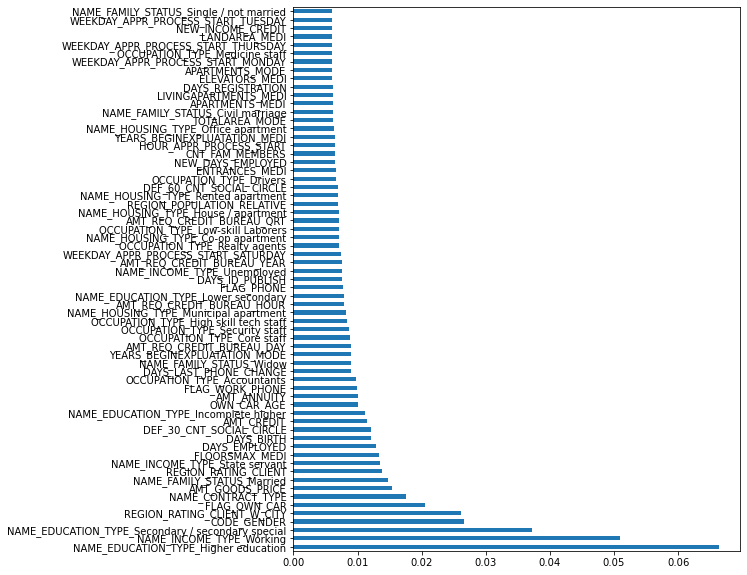

In [58]:
feat_imp = pd.Series(model.feature_importances_, index=A.columns)
feat_imp.nlargest(65).plot(kind='barh', figsize=(8,10))

In [59]:
unwanted = []
for col in A.columns:
    if col not in feat_imp.nlargest(65):
        unwanted.append(col)
A.drop(columns=unwanted,inplace=True)
A.sample(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Security staff,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,NEW_DAYS_EMPLOYED,NEW_INCOME_CREDIT
99916,0,0,0,187704.0,10903.5,148500.0,0.018029,-16935,-2785,-1638.0,...,0,0,0,0,1,0,0,0,0.164452,0.479478
4715,0,1,0,1006920.0,38484.0,900000.0,0.003818,-10932,-124,-5458.0,...,0,0,0,0,0,0,0,0,0.011343,0.223454
192188,0,0,0,346500.0,12573.0,346500.0,0.007274,-16903,-432,-9096.0,...,0,0,0,0,0,0,0,0,0.025558,0.519481
160814,0,0,0,1804500.0,54841.5,1804500.0,0.004960,-8884,-563,-3391.0,...,0,0,0,0,1,0,0,0,0.063372,0.120200
110473,0,1,0,891072.0,35469.0,720000.0,0.020713,-15089,-7709,-3820.0,...,0,0,0,0,0,0,0,1,0.510902,0.303006
54411,0,0,0,1288350.0,37800.0,1125000.0,0.030755,-22159,365243,-4810.0,...,0,0,0,0,0,0,1,0,-16.482829,0.115264
191639,0,0,1,545040.0,39627.0,450000.0,0.006207,-14595,-884,-2456.0,...,0,0,0,0,1,0,0,0,0.060569,0.148613
58800,0,0,1,900000.0,26446.5,900000.0,0.030755,-17646,-4314,-3425.0,...,0,0,0,0,0,0,0,0,0.244475,0.150000
116834,0,1,1,450000.0,21109.5,450000.0,0.026392,-12350,-2295,-538.0,...,0,0,0,0,0,0,0,0,0.185830,0.380000
148277,0,0,1,1223010.0,51948.0,1125000.0,0.072508,-22664,365243,-4893.0,...,0,0,0,0,0,0,0,0,-16.115558,0.239164


In [60]:
A.shape

(307511, 65)

In [61]:
A.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OWN_CAR_AGE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'APARTMENTS_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'APARTMENTS_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'TOTALAREA_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher educati

In [62]:
A.corr().shape[0]

65

In [63]:
# Create correlation matrix
corr_matrix = A.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
A.drop(to_drop, axis=1, inplace=True)

In [64]:
A.shape

(307511, 60)

In [65]:
A.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'APARTMENTS_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI',
       'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'TOTALAREA_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Unemployed',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDU

In [66]:
A1=A.drop(columns=['NEW_INCOME_CREDIT'])

In [67]:
#A1 = pd.concat([A, C], axis=1, join="inner")
#A1.shape

In [68]:
#len(A)

In [69]:
#plt.subplots(figsize=(20,15))
#sns.heatmap(A.corr(), annot = True)

In [70]:
#A2 = A1.drop(columns=['NEW_INCOME_CREDIT', 'NEW_INCOME_PER_PERSON'])

In [71]:
#A2.shape

### Processus de sous-échantillonnage

In [72]:
nm = NearMiss()
X, y=nm.fit_sample(A, B)

In [73]:
X.shape, y.shape

((49650, 60), (49650,))

In [74]:
#nm = NearMiss()
#X, y=nm.fit_sample(A1, B)

In [75]:
#X.shape, y.shape

### Suréchantillonnage

In [76]:
#smote = SMOTE()
#X, y=smote.fit_sample(A, B)

In [77]:
#X.shape,y.shape

### Machine Learning Test Split Algorithm

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [79]:
X_train.shape

(39720, 60)

In [80]:
X_test.shape

(9930, 60)

In [81]:
col_names = X_train.columns
features = X_train[col_names]

In [82]:
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

In [83]:
X_train = scaled_features

In [84]:
colt_names = X_test.columns
feature = X_test[colt_names]

In [85]:
scaler = StandardScaler().fit(feature.values)
feature = scaler.transform(feature.values)
scale_feature = pd.DataFrame(feature, columns = colt_names)

In [86]:
X_test = scale_feature

In [87]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [88]:
#X_train=pd.DataFrame(X_train)
#X_test = pd.DataFrame(X_test)

In [89]:
X_test.shape, X_train.shape

((9930, 60), (39720, 60))

### Multiple Classifier Testing

In [90]:
models = [
    "KNearest_Neighbors", "Linear_SVM", "Gradient_Boosting", 
    "Decision_Tree", "Random_Forest", "AdaBoost", 
    "LogisticRegression"
         ]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(penalty = 'l2', C=5, random_state = 0)]

In [91]:
scores = []
f2_score = []
recall=[] 

for name, clf in zip(models, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f2 = fbeta_score(y_test, y_pred, beta=2, average='binary')
    Recall=recall_score(y_test, y_pred)
    score = clf.score(X_test, y_test)
    scores.append(score)
    f2_score.append(f2)
    recall.append(Recall)

In [92]:
scores

[0.6341389728096677,
 0.6710976837865056,
 0.7046324269889225,
 0.7210473313192346,
 0.7342396777442095,
 0.7527693856998993,
 0.702920443101712]

In [93]:
f2_score

[0.6066860108708979,
 0.8435470927263442,
 0.8389536833476172,
 0.7114512471655328,
 0.8152403642931253,
 0.7951821432781859,
 0.7559412132582863]

In [94]:
recall

[0.5978654853000402,
 0.9313330648409183,
 0.9067660088602497,
 0.7076117599677809,
 0.8544099879178413,
 0.8149416028997181,
 0.778896496173983]

In [95]:
df = pd.DataFrame()
df['model'] = models
df['score'] = scores
df['f2_score'] = f2_score
df['Recall'] = recall
df =round(df, 4)

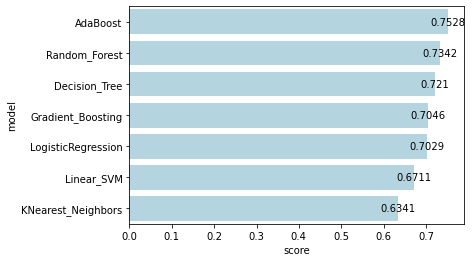

In [96]:
ax=sns.barplot(x="score",y="model",color='lightblue', data=df, order=df.sort_values('score', ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")

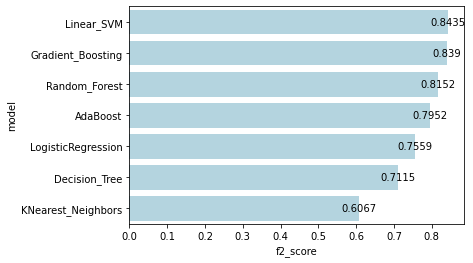

In [97]:
ax=sns.barplot(x="f2_score",y="model",color='lightblue', data=df, order=df.sort_values('f2_score',ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")

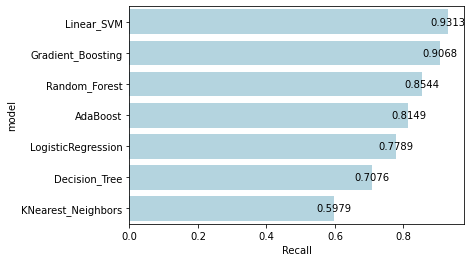

In [98]:
ax=sns.barplot(x="Recall",y="model",color='lightblue', data=df, order=df.sort_values('Recall',ascending = False).model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")

#### Multiple Classifier Testing using GridSearchCV

In [99]:
f2 = make_scorer(fbeta_score, beta=2, average='macro')

In [100]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [90,100,110]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini', 'entropy'],
            'max_depth': range (1,5)
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors':[4,5,6,7],
            'algorithm':['auto', 'kd_tree']
        }
    },
    'Adaboost': {
        'model': AdaBoostClassifier(),
        'params' : {
            'n_estimators': [50, 100],
            'learning_rate':[1.0]
        }
    },
    'Gradient_Boosting': {
        'model': GradientBoostingClassifier(),
        'params' : {
            'n_estimators': [100, 150],
            'learning_rate':[1.0]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [101]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], scoring=f2, cv=5, return_train_score=False)
    clf.fit(X_test, y_test)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.711019,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.774927,{'n_estimators': 100}
2,decision_tree,0.684852,"{'criterion': 'gini', 'max_depth': 4}"
3,KNeighbors,0.642100,"{'algorithm': 'auto', 'n_neighbors': 7}"
4,Adaboost,0.776799,"{'learning_rate': 1.0, 'n_estimators': 100}"
5,Gradient_Boosting,0.797310,"{'learning_rate': 1.0, 'n_estimators': 100}"
6,logistic_regression,0.699260,{'C': 1}


#### Hyperparameter tuning of Decision Tree Classifier Using GridSearchCV

In [102]:
DTree = DecisionTreeClassifier()
DTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [103]:
params = {
    "criterion":['gini', 'entropy'],
    "max_depth": range (1,10),
    "min_samples_split": range (1,10),
    "min_samples_leaf": range (1,5)
}

In [104]:
f2_score = make_scorer(fbeta_score, beta=2, average='binary')
grid=GridSearchCV(DTree, param_grid=params, scoring=f2_score, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             scoring=make_scorer(fbeta_score, beta=2, average=binary),
             verbose=1)

In [105]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [106]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [107]:
grid.best_score_

0.8506481448058277

In [108]:
dt = DecisionTreeClassifier(random_state=0, **grid.best_params_)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [109]:
dt.score(X_test, y_test)

0.6921450151057402

#### Grid SearchCV avec Random Forest Classifier

In [110]:
rfc = RandomForestClassifier(random_state=0)

In [111]:
params = {
    'n_estimators' : [100, 110, 120],
    'max_features':["log2", "sqrt"]
    }

In [112]:
f2_score = make_scorer(fbeta_score, beta=2, average='binary')
gs = GridSearchCV(estimator=rfc, param_grid=params, scoring=f2_score, cv=5, n_jobs=-1)

In [113]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [100, 110, 120]},
             scoring=make_scorer(fbeta_score, beta=2, average=binary))

In [114]:
gs.best_params_

{'max_features': 'sqrt', 'n_estimators': 120}

In [115]:
gs.best_score_

0.8024503276290413

In [116]:
rf = RandomForestClassifier(random_state=0, **gs.best_params_)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=120, random_state=0)

In [117]:
rf.score(X_test, y_test)

0.7705941591137966

In [118]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[3530, 1434],
       [ 844, 4122]])

In [119]:
accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
print(accuracy)
print(Precision)
print(Recall)
print(f1score)

0.7705941591137966
0.7419006479481641
0.8300443012484897
0.7835012355065576


In [120]:
explainer = shap.TreeExplainer(rf)
sv = explainer.shap_values(X_test.head(10))

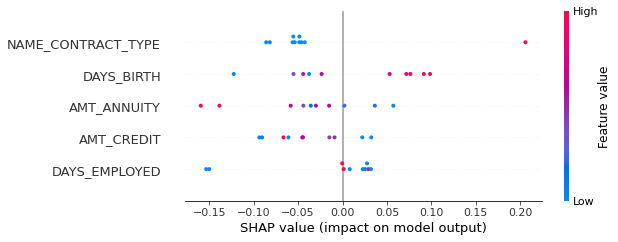

In [121]:
summary_plot(sv[0], X_test.head(10), max_display=5)

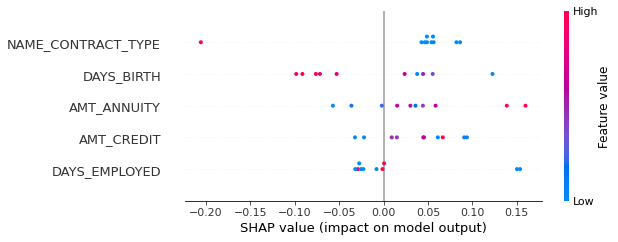

In [122]:
summary_plot(sv[1], X_test.head(10), max_display=5)

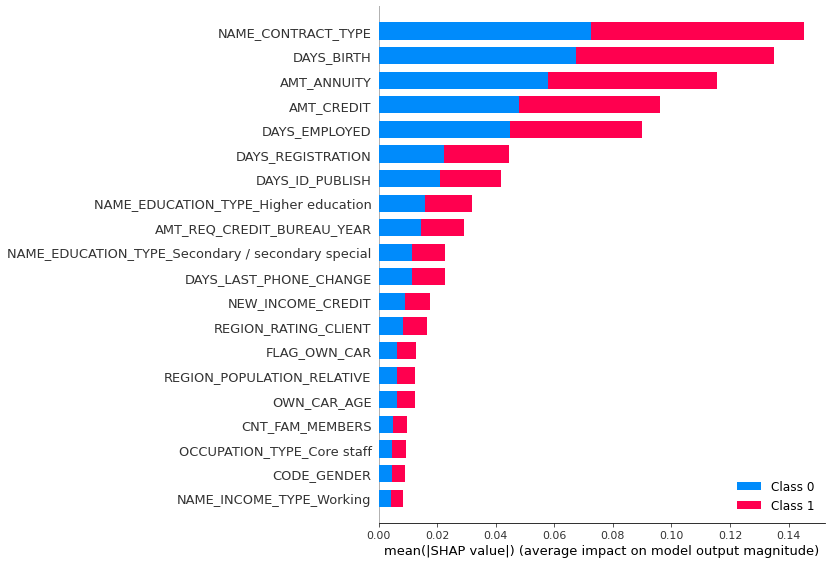

In [123]:
shap.summary_plot(sv, X_test, plot_type = 'bar')

#### Grid SearchCV avec Gradient Boosting

In [124]:
gboos = GradientBoostingClassifier(max_depth=4, min_samples_split=2, 
                                   min_samples_leaf=1, subsample=1,
                                   max_features='sqrt', random_state=0)

In [125]:
params = {
    'n_estimators' : [90, 100, 110],
    'max_features':["log2", "sqrt"]
    }

In [126]:
f2_score = make_scorer(fbeta_score, beta=2, average='binary')
gs = GridSearchCV(estimator=gboos, param_grid=params, scoring=f2_score, cv=5, n_jobs=-1)

In [127]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=0, subsample=1),
             n_jobs=-1,
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [90, 100, 110]},
             scoring=make_scorer(fbeta_score, beta=2, average=binary))

In [128]:
gs.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

In [129]:
gs.best_score_

0.7952834455337552

### Gradient Boost

In [130]:
gb = GradientBoostingClassifier(random_state=0, **gs.best_params_)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_features='sqrt', random_state=0)

In [131]:
gb.score(X_test, y_test)

0.7578046324269889

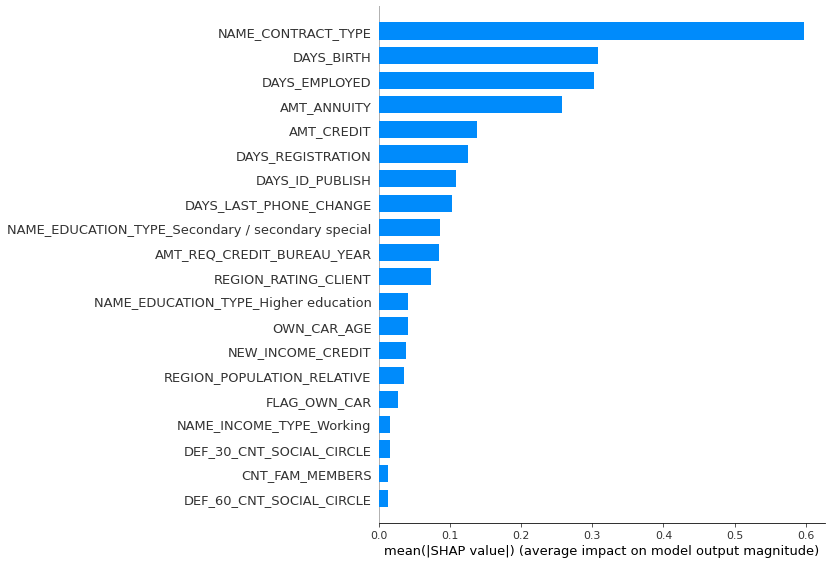

In [132]:
explainer = shap.TreeExplainer(gb)
sv = explainer.shap_values(X_test)
shap.summary_plot(sv, X_test, plot_type = 'bar')

In [133]:
y_pred = gb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[3521, 1443],
       [ 962, 4004]])

In [134]:
accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
print(accuracy)
print(Precision)
print(Recall)
print(f1score)

0.7578046324269889
0.7350835322195705
0.806282722513089
0.7690387016229713


#### GridSearchCV avec ADaBoost 

In [135]:
Adab = AdaBoostClassifier(random_state=0)

In [136]:
params = {
    'n_estimators' : [100, 110, 120],
    'learning_rate':[1, 1.1] 
    }

In [137]:
f2_score = make_scorer(fbeta_score, beta=2, average='binary')
gs = GridSearchCV(estimator=Adab, param_grid=params, scoring=f2_score, cv=5, n_jobs=-1)

In [138]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=-1,
             param_grid={'learning_rate': [1, 1.1],
                         'n_estimators': [100, 110, 120]},
             scoring=make_scorer(fbeta_score, beta=2, average=binary))

In [139]:
gs.best_params_

{'learning_rate': 1.1, 'n_estimators': 120}

In [140]:
Ab = AdaBoostClassifier(random_state=0, **gs.best_params_)
Ab.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1.1, n_estimators=120, random_state=0)

In [141]:
Ab.score(X_test, y_test)

0.7545820745216516

In [142]:
y_pred = Ab.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[3404, 1560],
       [ 877, 4089]])

In [143]:
accuracy=accuracy_score(y_test,y_pred)
Precision=precision_score(y_test, y_pred)
Recall=recall_score(y_test, y_pred)
f1score=f1_score(y_test, y_pred)
print(accuracy)
print(Precision)
print(Recall)
print(f1score)

0.7545820745216516
0.7238449283058949
0.8233991139750302
0.7704192180876119


### Pipeline

In [144]:
pipeline_lr=Pipeline([('pca1',PCA(n_components=10)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [145]:
pipeline_dt=Pipeline([('pca2',PCA(n_components=10)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [146]:
pipeline_randomforest=Pipeline([('pca3',PCA(n_components=10)),
                     ('rf_classifier',RandomForestClassifier())])

In [147]:
pipeline_AdaBoost=Pipeline([('pca4',PCA(n_components=10)),
                     ('Ad_classifier',AdaBoostClassifier())])

In [148]:
pipeline_GradBoost=Pipeline([('pca4',PCA(n_components=10)),
                     ('Gboos_classifier',GradientBoostingClassifier())])

In [149]:
pipeline_svm=Pipeline([('pca5',PCA(n_components=10)),
                     ('SVC_classifier',SVC())])

In [150]:
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_AdaBoost, pipeline_GradBoost, pipeline_svm]

In [151]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [152]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'AdaBoost', 
             4: 'Gradient Boosting', 5: 'SVC'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [153]:
for i,model in enumerate(pipelines):
    print("{} Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Accuracy: 0.6717019133937563
Decision Tree Accuracy: 0.6042296072507553
RandomForest Accuracy: 0.694662638469285
AdaBoost Accuracy: 0.6886203423967775
Gradient Boosting Accuracy: 0.6998992950654582
SVC Accuracy: 0.7025176233635448


In [154]:
data = {'Model': ['Logistic', 'DTree', 'RFC', 'AdaBoost','Gradient Boosting', 'SVC'], 
        'Accuracy': [0.6656, 0.60923, 0.66143, 0.67099, 0.69164, 0.69909]}  
df=pd.DataFrame(data)

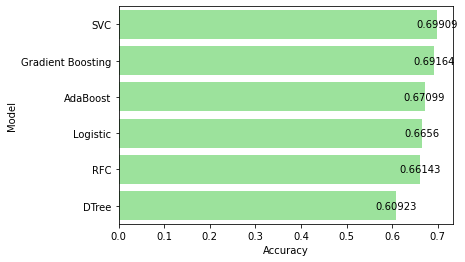

In [155]:
ax=sns.barplot(x="Accuracy",y="Model",color='lightgreen', data=df, order=df.sort_values('Accuracy',ascending = False).Model)
for p in ax.patches:
    ax.annotate(p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(0, 0), textcoords='offset points',ha='center', va="center")

In [156]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:SVC


#### Using MakePipelines pour RFC

In [157]:
pipe = make_pipeline((RandomForestClassifier()))
grid_param = [
                {"randomforestclassifier": [RandomForestClassifier()],
                 "randomforestclassifier__n_estimators": [90, 100, 110],
                 "randomforestclassifier__max_depth":[20, 25, 30],
                 "randomforestclassifier__min_samples_leaf":[1,2,5],
                 "randomforestclassifier__max_leaf_nodes": [2, 5, 10]}]
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0, n_jobs=-1) # Fit grid search
model = gridsearch.fit(X_train,y_train)

In [158]:
model.score(X_test,y_test)

0.7279959718026183

In [159]:
# Fit and predict test class probabilities
y_test_probs =model.predict_proba(X_test)[:,1]

# Containers for f-beta, precision, and recall scores at different prob. thresholds
f1_scores = []
f0_5_scores = []
f2_scores = []
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find scores for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(2)
        else:
            y_test_preds.append(1)
            
    f1 = f1_score(y_test, y_test_preds, average='macro')
    f0_5 = fbeta_score(y_test, y_test_preds, beta=0.5, average='macro')
    f2 = fbeta_score(y_test, y_test_preds, beta=2, average='macro')
    prec = precision_score(y_test, y_test_preds, average='macro')
    rec = recall_score(y_test, y_test_preds, average='macro')
        
    f1_scores.append(f1)
    f0_5_scores.append(f0_5)
    f2_scores.append(f2)
    precision_scores.append(prec)
    recall_scores.append(rec)

<Figure size 288x576 with 0 Axes>

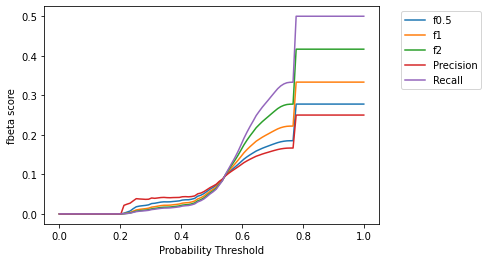

In [160]:
plt.figure(figsize=(4, 8))
fig, ax = plt.subplots()
ax.plot(probability_thresholds, f0_5_scores , label='f0.5')
ax.plot(probability_thresholds, f1_scores, label='f1')
ax.plot(probability_thresholds, f2_scores, label='f2')
ax.plot(probability_thresholds, precision_scores, label='Precision')
ax.plot(probability_thresholds, recall_scores, label='Recall')
ax.set_xlabel('Probability Threshold')
ax.set_ylabel('fbeta score')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left');